[View in Colaboratory](https://colab.research.google.com/github/calicinio/Testando/blob/master/RN_Exerc%C3%ADcio_Computacional_II_Regress%C3%A3o_Log%C3%ADstica_python3.ipynb)

# Exercício Computacional II - Regressão Logística

## Descrição

Nesse exercício iremos revisar o conteúdo do segundo módulo da disciplina. 

Iremos abordar os seguintes tópicos:

* Regressão Logística
* Gradiente Ascendente
* Aplicação em reconhecimento de caracteres

Para isso vocês irão utilizar as bibliotecas de programação científica da linguagem python (pandas, numpy, matplotlib, etc).

Inicialmente, iremos carregar todas as bibliotecas que iremos utilizar.
Execute o trecho de código abaixo para carregá-las (para executar uma célula, selecione-a e pressione ctrl+enter)

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from IPython import display

np.random.seed(1)

Nesse exercício iremos utilizar o modelo de regressão logística para resolver problemas de classificação de padrões. 

Os parâmetros do modelo serão estimados pelo estimador de máxima verossimilhança. Utilizaremos o algoritmo do gradiente ascendente para encontrar os parâmetros relacionados ao valor ótimo da verossimilhança iterativamente.

Uma vez validado o algoritmo, iremos utilizá-lo para construir um modelo que analisa a imagem de um dígito escrito à mão e avalia se o número correspondente é par ou ímpar.

### Função Logística

Inicialmente,  você deve implementar a função logística, dada por:

\begin{equation}
g(z) = \frac{1}{1 + exp(-z)}
\end{equation}

Uma vez implementada a função e executada a célula, você deverá ser capaz de visualizar uma figura similar à figura abaixo:

<img src="http://test.solnix.com.br/img/logistic_function.png">


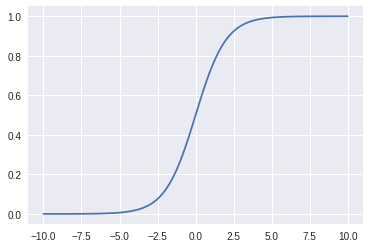

In [30]:
def sigm(z):
    g = 1/(1 + np.exp(-z))
    return g;

z = np.linspace(-10, 10, 100)
y = sigm(z)
plt.plot(z, y)

### Visualização dos Dados

Em seguida, você irá realizar uma análise gráfica visual de um problema de classificação de padrões binário composto por um conjunto de amostras bidimensionais geradas artificialmente.

O código abaixo gera as amostras do problema a ser analisado. As amostras são definidas como pares de entradas e saída correspondente:  $(\mathbf{x_i}, y_i; i \in 1, \cdots, n)$, onde $\mathbf{x_i} \in \mathbb{R}^2$, $y_i \in \{0, 1\}$ e $n$ corresponde ao número de amostras. 

As entradas são armazenadas em uma matriz $X$ de dimensão $n \times d+1$, sendo que a primeira coluna é referente aos valores de $x_{i0}=1$ para $i \in 1, \cdots, n$. 

As saídas são armazenadas em um vetor $y$ contendo $n$ valores.

In [0]:
n = 200
d = 2;

sigma = 0.04
Sigma = sigma*np.eye(d)
mu1 = [0, 1]
mu2 = [1, 0]

x1 = np.random.multivariate_normal(mu1, list(Sigma), int(n/2))
x2 = np.random.multivariate_normal(mu2, list(Sigma), int(n/2))

# Dados de entrada
X = np.r_[x1,x2]

# Insere-se uma coluna de 1s correspondente aos x_{i0}=1
X = np.c_[np.ones(n), X]

# Saídas correspondentes
y = np.r_[np.zeros(int(n/2)), np.ones(int(n/2))]

Uma vez gerado os dados,  você deve implementar uma função que recebe como argumentos a matriz contendo os dados de entrada $X$ e  vetor com as saídas correspondentes $y$ e plote as amostras em um gráfico de $x_{i1}$ em função de $x_{i2}$. 

Caso a saída correspondente à amostra seja $1$, esta deve ser plotada em vermelho e, caso contrário, em azul.

Uma vez implementada a função e executada a célula abaixo, você deve ser capaz de visualizar uma figura similar à:

<img src="http://test.solnix.com.br/img/samples_2d.png">

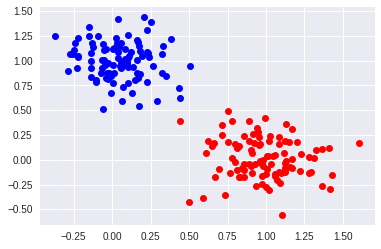

In [32]:
def plot_samples(X, y):
  for i in range(0, len(y)):
    if y[i] == 0:
      plt.plot(X[i,1], X[i,2], 'bo')
    else:
      plt.plot(X[i,1], X[i,2], 'ro')
  
    
plot_samples(X,y)

### Região de Decisão do Modelo

Inicialmente, iremos utilizar a implementação do modelo da regressão logística presente na biblioteca *scikit-learn* (http://scikit-learn.org/). 

Essa biblioteca é parte da distribuição *Anaconda* e implementa diversos modelos e algoritmos de aprendizado. Incluindo os modelos vistos nas últimas aulas, tais como: regressão linear, regressão logística, perceptron e o algoritmo do gradiente descendente.

Iremos estimar um modelo de regressão logística para os dados bidimencionais que estamos analisando.

In [33]:
#Importa o modelo da regressão logística presente na biblioteca
from sklearn.linear_model import LogisticRegression

# Controi um objeto do tipo LogistiRegression que representa o modelo
model = LogisticRegression()

# Estima os parâmetros do modelo a partir das amostras 
model.fit(X[:,1:],y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Uma vez estimado o modelo, iremos extrair o vetor de parâmetros estimados, $\mathbf{\theta}$.

In [34]:
theta = np.r_[model.intercept_, model.coef_[0]]
print(theta)

[ 0.03440589  3.47228575 -3.5225572 ]


Dado os parâmetros, você deve implementar uma função que plote as amostras em duas dimensões e a reta que representa  a fronteira da região de decisão do classificador.

Conforme visto em aula, a reta é dada por:

\begin{equation}
x_2 = -\frac{\theta_0}{\theta_2} - \frac{\theta_1}{\theta_2} x_1
\end{equation}

Implemente a função abaixo que recebe como argumentos a matriz de entradas $X$, o vetor de saídas correspondentes $y$ e o vetor de parâmetros $\mathbf{\theta}$ e plote as amostras em duas dimensões e a reta referente a região de decisão (utilize a função *plot_samples* como parte da sua implementação).

Uma vez implementada a função e executada a célula, você deve ser capaz de visualizar uma figura similar à figura abaixo:

<img src="http://test.solnix.com.br/img/decision_line.png">

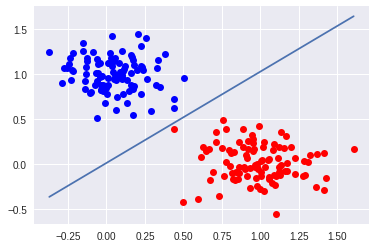

In [35]:
def plot_decision_surface(X, y, theta):
    x1 = np.linspace(X[:,1].min(), X[:,1].max())
    x2 = -(theta[0]/theta[2]) - (theta[2]/theta[1]) * x1
    
    plot_samples(X, y)
    plt.plot(x1, x2)
    


plot_decision_surface(X,y,theta)

###  Gradiente Ascendente

Agora, você irá implementar a sua versão do algoritmo do gradiente ascendente para estimar os parâmetros da regressão logística.

Inicialmente, você deve implementar uma função que calcule a saída correspondente do modelo para um conjunto de entradas  $X$, dado um vetor de parâmetros $\theta$.

Lembre-se que a saída do modelo para cada padrão de entrada, isto é, para cada linha da matriz $X$, é dada por:

\begin{equation}
\hat{y}_i = \frac{1}{1 + \exp (-\mathbf{x_i}^T\theta)}
\end{equation}

In [0]:
def compute_yhat(X,theta):
    yhat = 1 / (1 + np.exp( np.dot(-X, theta)))
    return yhat

y_hat = compute_yhat(X,theta)


assert y_hat.shape[0] == X.shape[0]
assert np.max(y_hat) <= 1
assert np.min(y_hat) >= 0
assert np.abs(y_hat[100]-0.933873877649) <= 0.001

Em seguida, você deve implementar uma função que estime o gradiente da log verossimilhança do modelo da regressão logística.

Lembre-se que a derivada parcial da log verossmilhança em relação a cada um dos parâmetros $\theta_j$ para $j=0,\cdots,d$ (nesse problema $d=2$) é dado por:

\begin{equation}
\frac{\partial \ell(\theta)}{\partial \theta_j} = \sum_{i=1}^n (y_i - g(\mathbf{x_i}^T \theta))x_{ij}
\end{equation}

O vetor gradiente resultante deve ter $d+1$ valores (no problema em questão d=2), sendo o $j$-ésimo valor definido como  $\frac{\partial \ell(\theta)}{\partial \theta_j}$ 


In [0]:
def compute_grad(X,y,theta):
    n = X.shape[0]
    yhat = compute_yhat(X,theta)
    grad = (y - yhat).dot(X)
    return grad

grad = compute_grad(X,y,theta)

assert grad.shape[0] == d+1
assert np.abs(grad[1]-3.47234789) <= 0.001

Em seguida, você irá implementar uma função que calcula o valor da log verossimilhança do modelo da regressão logística.

A log verossimilhança é dada por:

\begin{equation}
\ell(\theta) = \sum_{i=1}^n y_i \log(g(\mathbf{x_i}^T \theta)) + (1-y_i) \log(1-g(\mathbf{x_i}^T \theta))
\end{equation}

In [0]:
def compute_loglike(X,y,theta):
    yhat = compute_yhat(X, theta)
    loglike = np.dot(y, np.log(yhat)) + np.dot( 1 - y, np.log(1 - yhat))
    return loglike

loglike = compute_loglike(X,y,theta)

assert np.abs(loglike+11.175104346) < 0.001

Agora, você já possui todas as funções necessárias para que a função abaixo que implementa o algoritmo do gradiente ascedente funcione.

Lembre-se que esse algoritmo visa encontrar, de forma iterativa, o valor ótimo dos parâmetros que maximiza a log verossimilhança do modelo. 


A função abaixo implementa o algoritmo do gradiente ascedente para estimar os parâmetros do modelo da regressão logística. 

Os argumentos de entrada da função são: a matriz de entradas $X$, o vetor de saídas correspondentes $y$, o valor da taxa de aprendizado $\alpha$ e o número máximo de iterações *max_iter*. 

A função retorna o vetor ótimo dos parâmetros, $\theta$. 

Além disso, a função plota os resultados intermediários ao longo da execução.

In [0]:
def gradient_ascent(X,y,alpha=0.01, max_iter = 50):
    # Número de amostras
    n = X.shape[0]
    
    # Dimensão dos dados
    d = X.shape[1]-1    
    
    # Valor inicial dos parâmetros é definido como um valor aleatório com 
    # distribuição uniforme no intervalo [-1,1]
    theta = np.random.uniform(-1.0, 1.0, d+1)

    # O Algoritmo terá duas condições de parada:
    #  - norma do vetor gradiente menor que o limiar epsilon
    #  - número de iterações maior que max_iter
    # Número máximo de iterações
    iter = 0
    # Parâmetro que defini o limiar utilizado para definir a condição de parada do algoritmo
    epsilon = 1e-5
    
    # Figura utilizada para plotar os resultados parciais do algoritmo
    if d==2:
        plt.figure(figsize=(15,10))
    else:
        plt.figure(figsize=(15,5))
    # A figura é dividida em 4 subplots
    gs = gridspec.GridSpec(2,2)
    # Caso d != 2 a figura é dividida em apenas 2 subplots,
    # pois não é possível visualizar os dados
    if d!=2:
        gs = gridspec.GridSpec(1,2)

    # Vetores que irão armazenar os valores da log verossmilhança e 
    # da norma do vetor de gradiente ao longo das iterações 
    loglike = np.zeros(max_iter)
    gradient_norm = np.zeros(max_iter)
    
    print y.shape
    
    while (np.linalg.norm(compute_grad(X,y,theta)) > epsilon and iter < max_iter):

        # Embaralha as linhas da matriz de entrada X e as saídas correspondentes à cada iteração
        seq = np.random.permutation(n)
        X = X[seq,:]
        y = y[seq]
        
        # Calcula o gradiente da função
        grad = compute_grad(X,y,theta)
        
        # Atualiza os parâmetros do modelo
        theta = theta + alpha*grad
        
        # Armazena os valores da log verossimilhança e da norma
        # do vetor gradiente
        loglike[iter] = compute_loglike(X,y, theta)
        gradient_norm[iter] = np.linalg.norm(grad)
        
        # Plota os resultados a cada iteração
        plot_idx = 0;
            
        if (d==2):
            # Plota os dados e a reta que define a fronteira da região de decisão
            # do classificador caso os dados sejam bidimensionais
            plt.subplot(gs[plot_idx])
            plt.cla()
            plot_decision_surface(X,y, theta)
            plt.title('Iteration: %d - theta: [%.5f %.5f %.5f]'%
                (iter+1, theta[0], theta[1], theta[2]))
            plot_idx = plot_idx + 1
            
        # Plota a norma do vetor gradiente ao longo das iterações
        plt.subplot(gs[plot_idx])
        plt.semilogy(gradient_norm[:iter], 'k-')
        plt.xlabel('Iteration')
        plt.ylabel('Gradient Norm')
        plt.title('Gradient Norm vs Iterations')
        plot_idx = plot_idx + 1
        
        # Plota a log verossimilhaça do modelo ao longo das iterações
        plt.subplot(gs[plot_idx])
        plt.plot(loglike[:iter] , 'k-')
        plt.xlabel('Iteration')
        plt.ylabel('Log Likelihood')
        plt.title('Log Likelihood vs Iterations %.4f'%(loglike[iter]))
        plot_idx = plot_idx + 1
            
        display.clear_output(wait=True)
        display.display(plt.gcf())
            
        iter = iter + 1
           
    display.clear_output(wait=True)
    
    if (d==2):
        # Plota os contornos da saída do modelo
        x1s, x2s = np.mgrid[x1.min()-1:x1.max()+1:0.1, x2.min()-1:x2.max()+1:0.1]
        zs = sigm(theta[1]*x1s + x2s*theta[2] + theta[0])
        N = zs/zs.max()
        plt.subplot(gs[3])
        plt.contourf(x1s,x2s, zs, np.linspace(zs.min(), zs.max(), 30))
        plt.scatter(X[:,1],X[:,2], color ='k')
        plt.xlabel('x1')
        plt.ylabel('x2')
    return theta

Agora, você deve executar o algoritmo para os dados do problema que estamos analisando. 

Caso você tenha implementado as funções anteriores corretamente, você deverá ser capaz de visualizar uma animação e, ao final da execução, uma figura similar à figura abaixo:

<img src="http://test.solnix.com.br/img/gradient_ascent_2d.png">

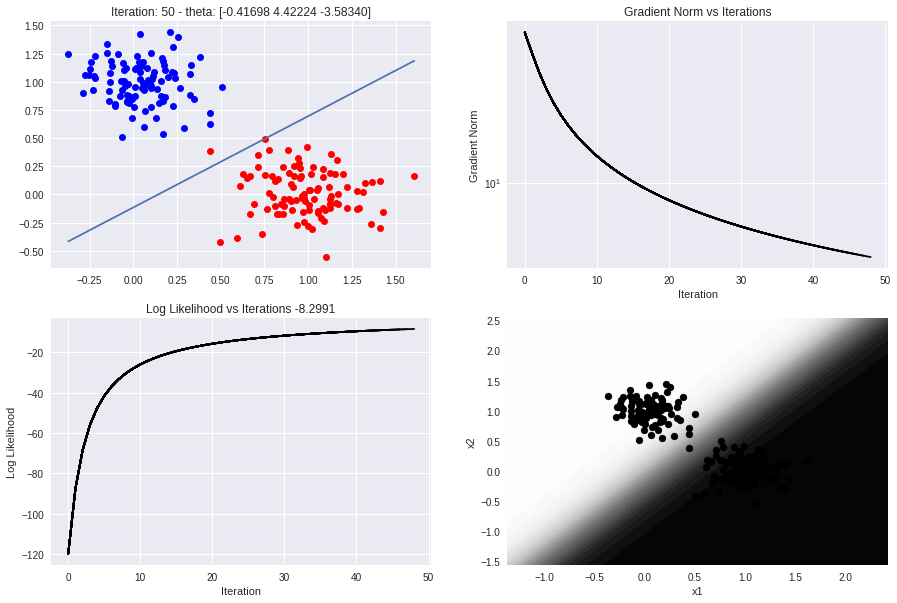

In [40]:
theta = gradient_ascent(X,y)

### Classificação de Imagens de Dígitos

Agora você irá utilizar a sua implementação do algoritmo do gradiente ascendente para construir um modelo baseado em regressão logística que seja capaz de, dado uma imagem de um dígito, estimar se o número correspondente é par ou ímpar.

Para isso iremos utilizar a base de dados de dígitos da biblioteca *scikit-learn*.

Essa base possui $1797$ imagens de dígitos com anotações do número correspondente. Cada imagem tem resolução de $8\times8$ píxeis.

O código abaixo carrega a base de dados e plota as primeiras $10$ imagens da base.

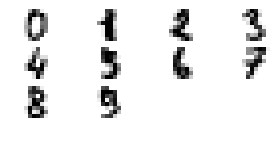

In [41]:
from sklearn.datasets import load_digits

digits = load_digits()
plt.figure(figsize=(5,2))
gs = gridspec.GridSpec(3,4)
for i in range(10):
    plt.subplot(gs[i])
    plt.axis('off')
    plt.imshow(digits.images[i], cmap=plt.cm.gray_r, interpolation='nearest')

Cada imagem é representada por uma matriz de dimensões $8\times8$, sendo que cada elmeneto da matriz corresponde a intensidade do píxel correspondente em uma escala de tons de cinza variando de 0 a 15 (0=branco, 15=preto). 

A primeira imagem da base corresponde à seguinte matriz:

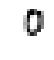

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [42]:
plt.figure(figsize=(0.5,0.5))
plt.axis('off')
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

print(digits.images[0])

Para que você possa utilizar seu modelo para estimar a paridade dos dígitos, as entradas correspondentes a cada  uma das imagens devem ser convertidas de uma matriz para um vetor. 

A base de dados de dígitos disponível na biblioteca *scikitlearn* já possui todos os valores convertidos para vetores no campo *digits.data*, por exemplo, a matriz acima corresponde ao seguinte vetor contendo $64$ elementos:

In [43]:
print(digits.data[0].shape)
print(digits.data[0])

(64,)
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


Dessa forma, os vetores serão definidos como entradas do modelo. 

Porém, antes de treinar o modelo, os dados devem ser normalizados. A normalização dos dados facilita a convergência do algoritmo do gradiente ascendente.

Iremos normalizar os vetores de entrada para que estes tenham média zero e variância unitária. Para isso iremos utilizar a função *preprocessing.scale* da biblioteca *scikit-learn*.

Primeiro, leia a documentação da função presente no link abaixo (inicio da seção 4.3):

http://scikit-learn.org/stable/modules/preprocessing.html

Em seguida, crie um vetor denominado *digits_data* contendo os dados normalizados

In [0]:
from sklearn import preprocessing
from sklearn.preprocessing import normalize

digits_data = preprocessing.scale(digits.data)

A anotação do número correspondente a cada imagem está presente no campo *digits.target*, por exemplo:

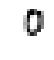

Número:0


In [45]:
plt.figure(figsize=(0.5,0.5))
plt.axis('off')
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

print('Número:'+str(digits.target[0]))

Utilize os dados normalizados presentes na variável *digits_data* e as anotações para criar uma matriz de entradas $X$ e um vetor de saídas correspondentes $y$.

Para criar a matriz de entradas você terá que incluir a coluna de 1s correspondentes aos valores de $x_{i0}$ na matriz $X$. 

Já o vetor de saídas correspondentes será composto por valores binários, sendo que o valor $0$ corresponde a um dígito ímpar e o valor $1$ a um dígito par.

In [0]:
n = digits_data.shape[0]

uns = np.ones(n)

#matriz com vetores de entrada
X = np.c_[uns, digits_data]

#retorna todos os indices dos numeros pares
idx_par = np.where(digits.target%2 == 0)

y = np.zeros(n)
y[idx_par] = 1


Divida os dados em um conjunto de treinamento e teste. Utilize $80\%$ das amostras no conjunto de treinamento e o restante no conjunto de teste (você pode utilizar a função que você criou no exercício anterior).

In [0]:
ntrain = int(n*0.8)

Xtrain = X[:][0:ntrain]
ytrain = y[0:ntrain]

Xtest = X[:][ntrain+1:]
ytest = y[ntrain+1:]


Estime os parâmetros do modelo utilizando as amostras do conjunto de treinamento

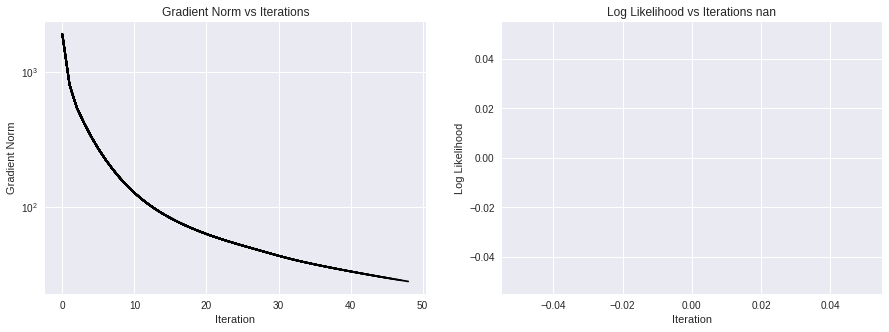

In [48]:
theta = gradient_ascent(Xtrain, ytrain, alpha = 0.001, max_iter=50)

Agora você deve avaliar o quão bom é o seu modelo. Para isso calcule a saída estimada do seu modelo para o conjunto de testes e calcule quantos erros o seu modelo cometeu. 

Utilize os valores de referência (*ytest*) para estimar os erros para dígitos pares e ímpares separadamente, isto é, você deve estimar a porcentagem de imagens correspondentes a números pares que seu modelo classificou incorretamente como ímpar, e a porcentagem de imagens correspondentes a números ímpares que o seu modelo classificou incorretamente como par.

Porém, antes de estimar as porcentagens, você deve converter a saída do seu modelo para valores binários. A saída do seu modelo corresponde a um valor escalar no intervalo $[0,1]$. Você deve converter para valores binários $\{0,1\}$. Para isso utilize a regra vista em aula, ou seja, a saída binária será $0$, caso a saída escalar for menor ou igual a $0.5$, e $1$, caso contrário.

In [49]:
yhat = compute_yhat(Xtest, theta)

idx_yhat_1 = np.where(yhat <= 0.5)

yhat_bin = np.zeros(len(yhat))
yhat_bin[idx_yhat_1] = 1

#retorna todos os indices dos numeros pares
idx_par_test = np.where(ytest == 1)
idx_impar_test = np.where(ytest == 0)

#divide o total de acertos pelo total de que deveria acertar
odd_err_perc = sum(yhat_bin[idx_par_test]) / len(idx_par_test[0]) * 100
#subtrai o somatorio do valor total de indices e divide pelo total de acertos
even_err_perc = (len(idx_impar_test[0]) - sum(yhat_bin[idx_impar_test])) / len(idx_impar_test[0]) * 100

print('Percentagem dos dígitos ímpares classificados incorretamente: '+str(odd_err_perc))
print('Percentagem dos dígitos pares classificados incorretamente: '+str(even_err_perc))

Percentagem dos dígitos ímpares classificados incorretamente: 8.522727272727272
Percentagem dos dígitos pares classificados incorretamente: 9.836065573770492


Finalmente, você pode testar seu modelo visualizando as imagens de entrada e a saída do seu modelo.

O código abaixo seleciona uma imagem aleatória do conjunto de testes e apresenta a estimativa do seu modelo, o valor esperado e a imagem.

Indice da Imagem     : 131
Estimativa do Modelo : Impar
Valor esperado       : Par (Dígito 5)


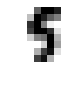

In [65]:
test_images = digits.images[ntrain:]
test_label = digits.target[ntrain:]

img_idx = int(np.random.uniform(0, 358))

plt.figure(figsize=(1,1))
plt.axis('off')
plt.imshow(test_images[img_idx], cmap=plt.cm.gray_r, interpolation='nearest')
print('Indice da Imagem     : '+str(img_idx))
print('Estimativa do Modelo : '+('Par' if yhat_bin[img_idx] else 'Impar'))
print('Valor esperado       : '+('Par' if ytest[img_idx] else 'Impar')+' (Dígito '+str(test_label[img_idx])+')')